## 문제 설명
- 두 문자열 s와 skip, 그리고 자연수 index가 주어질 때, 다음 규칙에 따라 문자열을 만들려 합니다. 암호의 규칙은 다음과 같습니다.

    - 문자열 s의 각 알파벳을 index만큼 뒤의 알파벳으로 바꿔줍니다.
    - index만큼의 뒤의 알파벳이 z를 넘어갈 경우 다시 a로 돌아갑니다.
    - skip에 있는 알파벳은 제외하고 건너뜁니다.
- 예를 들어 s = "aukks", skip = "wbqd", index = 5일 때, a에서 5만큼 뒤에 있는 알파벳은 f지만 [b, c, d, e, f]에서 'b'와 'd'는 skip에 포함되므로 세지 않습니다. 따라서 'b', 'd'를 제외하고 'a'에서 5만큼 뒤에 있는 알파벳은 [c, e, f, g, h] 순서에 의해 'h'가 됩니다. 나머지 "ukks" 또한 위 규칙대로 바꾸면 "appy"가 되며 결과는 "happy"가 됩니다.

- 두 문자열 s와 skip, 그리고 자연수 index가 매개변수로 주어질 때 위 규칙대로 s를 변환한 결과를 return하도록 solution 함수를 완성해주세요.

## 제한사항
- 5 ≤ s의 길이 ≤ 50
- 1 ≤ skip의 길이 ≤ 10
- s와 skip은 알파벳 소문자로만 이루어져 있습니다.
    - skip에 포함되는 알파벳은 s에 포함되지 않습니다.
- 1 ≤ index ≤ 20

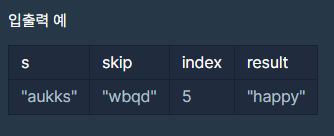

In [100]:
# 예제를 정한다.
s = "aukks"
skip = "wbqd"
index = 5
# 결과 값으로 'happy'가 출력되야 한다.

In [101]:
# string 라이브러리에서 소문자 알파벳 리스트를 부러온다.
from string import ascii_lowercase

def solution(s, skip, index):
    # 리스트 내 for문으로 알파벳리스트의 값이 skip 들어있지 않은 값만 alphabet에 할당한다.
    alphabet = [x for x in ascii_lowercase if x not in skip]
    # 예제 index 값과 달리 index의 값이 alphabet보다 훨씬 많을 수 있다.
    # 나머지 값을 이용하여 index를 다시 정해준다.
    index = index % len(alphabet)
    # 답을 적을 answer 변수를 만든다.
    answer=''
    # for문을 돌려 문자열 s의 값 하나하나를 i에 할당한다.
    for i in s:
        # 만약 i와 같은 alphabet의 요소의 인덱스 값 + index 값이 alphabet의 길이보다 길다면
        if alphabet.index(i)+index >= len(alphabet):
            # i와 같은 alphabet의 요소의 인덱스 값 + index 값에서 alphabet의 길이만 큼
            # 빼준 인덱스값에 해당하는 alphabet을 찾아 answer에 더한다.
            answer += alphabet[(alphabet.index(i)+index)-len(alphabet)]
        else:
            # i와 같은 alphabet의 요소의 인덱스 값 + index 값이 alphabet보다 작다면
            # 그 값에 해당하는 alphabet 값을 answer에 넣는다.
            answer += alphabet[alphabet.index(i)+index]
        
    return answer

In [102]:
solution(s, skip, index)

'happy'

## 결과를 확인하면 'happy'가 정상 출력된다.

## 다른 풀이를 살펴보자.

#### set를 활용한 풀이

In [106]:
s = "aukks"
skip = "wbqd"
index = 5

In [111]:
from string import ascii_lowercase

def solution(s, skip, index):
    result = ''
    
    # 알파뱃리스트를 집합으로 바꿔서 a_to_z에 할당한다.
    a_to_z = set(ascii_lowercase)
    # 집합 데이터타입의 특성으로
    # a_to_z(알파벳집합)에서 set(skip)(빼야되는 알파벳 집합)을 빼준다.
    a_to_z -= set(skip)
    # skip요소가 빠진 a_to_z를 정렬한다.
    a_to_z = sorted(a_to_z)
    # 정렬된 a_to_z의 길이를 구한다.
    l = len(a_to_z)
    
    # enumerate를 사용해 각 인덱스값과 인덱스에 해당하는 요소값을 딕셔너리 파일로 만들어
    # dic_alpha에 할당한다.
    # dic_alpha = {'a': 0,'c': 1,'e': 2,'f': 3,'g': 4,'h': 5,'i': 6,'j': 7,....}
    dic_alpha = {alpha:idx for idx, alpha in enumerate(a_to_z)}
    
    # for 문을 돌려 문자열 s의 요소 하나하나를 i에 대입한다.
    for i in s:
        # i에 a를 집어넣었을 때
        # dic_alpha[a]는 0이된다.
        # index는 5이므로 0 + 5 = 5
        # 여기서 만약 dic_alpha[i] + index 값이 a_to_z의 범위를 벗어날 수 있으므로
        # len(a_to_z) 값으로 나눈 후 나머지를 구한다.
        # len(a_to_z)는 22 이므로
        # 5에서 22를 나누면 몫은 0이요, 나머지는 5이다.
        # a_to_z[5]의 값은 'h'가 된다.
        result += a_to_z[(dic_alpha[i] + index) % l]
    
    # for문으로 반복을 마치고 result값을 반환한다.
    return result

In [113]:
# 함수를 실행해 보자.
solution(s, skip, index)

'happy'

## 결과를 확인하면 역시 'happy'가 정상 출력된다.